# Text Summarizer

In [180]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import sys
import os
import bs4 as bs
import urllib.request
import re
import nltk
import heapq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [173]:
filterwarnings('ignore')

In [27]:
#Read the article
article=open('article.txt','r').read()

In [29]:
article[:500]

"Few management theorists have been more persistently criticized than has Frederick W. Taylor, the founder of scientific management, despite his being widely recognized as a key figure in the history of managment thought (Wren, 1979). Taylor and scientific management frequently were attacked in his own lifetime, prompting, among other responses, Gilbreth's Primer (Gilbreth, 1914/1973), and the criticisms have continued to this day. The present author agrees with Drucker (1976), although not with "

In [30]:
#We split the article into sentences in a list.
sentences=sent_tokenize(article)

In [31]:
#First 3 sentences
sentences[:3]

['Few management theorists have been more persistently criticized than has Frederick W. Taylor, the founder of scientific management, despite his being widely recognized as a key figure in the history of managment thought (Wren, 1979).',
 "Taylor and scientific management frequently were attacked in his own lifetime, prompting, among other responses, Gilbreth's Primer (Gilbreth, 1914/1973), and the criticisms have continued to this day.",
 'The present author agrees with Drucker (1976), although not with all of his specific points, that Taylor has never been fully understood or appreciated by his critics.']

In [32]:
# We removed square brackets and extra paces
article = re.sub(r'\[[0-9]*\]', ' ', article)
article = re.sub(r'\s+', ' ', article)
# We removed special characters and digits
article = re.sub('[^a-zA-Z]', ' ', article )
article = re.sub(r'\s+', ' ', article)

## Calculate Each Word Frequency

In [33]:
word_freq={}

for word in word_tokenize(article):
    if word not in set(stopwords.words('english')):
        if word not in word_freq.keys():
            word_freq[word]=1
        else:
            word_freq[word]+=1

In [88]:
word_freq

{'Few': 1,
 'management': 51,
 'theorists': 1,
 'persistently': 1,
 'criticized': 2,
 'Frederick': 1,
 'W': 1,
 'Taylor': 145,
 'founder': 1,
 'scientific': 25,
 'despite': 2,
 'widely': 2,
 'recognized': 1,
 'key': 3,
 'figure': 7,
 'history': 2,
 'managment': 1,
 'thought': 1,
 'Wren': 9,
 'frequently': 4,
 'attacked': 2,
 'lifetime': 2,
 'prompting': 1,
 'among': 1,
 'responses': 1,
 'Gilbreth': 6,
 'Primer': 1,
 'criticisms': 6,
 'continued': 1,
 'day': 9,
 'The': 32,
 'present': 9,
 'author': 8,
 'agrees': 2,
 'Drucker': 7,
 'although': 7,
 'specific': 7,
 'points': 3,
 'never': 3,
 'fully': 5,
 'understood': 1,
 'appreciated': 1,
 'critics': 1,
 'Many': 2,
 'either': 2,
 'invalid': 1,
 'involved': 5,
 'peripheral': 1,
 'issues': 6,
 'major': 6,
 'ideas': 9,
 'contributions': 1,
 'often': 6,
 'gone': 1,
 'unacknowledged': 1,
 'superb': 1,
 'job': 14,
 'showing': 1,
 'permeated': 1,
 'field': 3,
 'United': 1,
 'States': 1,
 'abroad': 1,
 'However': 10,
 'concerned': 2,
 'primarily'

In [87]:
len(word_freq)

1484

In [78]:
list(word_freq.keys())[7]

'Taylor'

In [201]:
pd_word_freq=pd.Series(word_freq.values()).sort_values(ascending=False)
index_words=pd_word_freq.index.tolist()
index_words[:20]

[7,
 1,
 30,
 177,
 227,
 9,
 500,
 303,
 320,
 179,
 140,
 328,
 166,
 1257,
 1242,
 85,
 56,
 133,
 548,
 454]

In [124]:
max_freq=max(word_freq.values())

df_word_freq=pd.DataFrame(columns=[['Word','Count']])

words_list,counts_list=[],[]


for idx_word in index_words:
    word=list(word_freq.keys())[idx_word]
    count=word_freq[word]
    words_list.append(word)
    counts_list.append(count)
    
df_word_freq['Word']=words_list
df_word_freq['Count']=counts_list
    
    

In [202]:
df_word_freq

,Word,Count
0,Taylor,145
1,management,51
2,The,32
3,work,30
4,one,27
...,...,...
1479,answer,1
1480,depend,1
1481,nature,1
1482,Responsibility,1


# Wordcloud

In [191]:
from PIL import Image

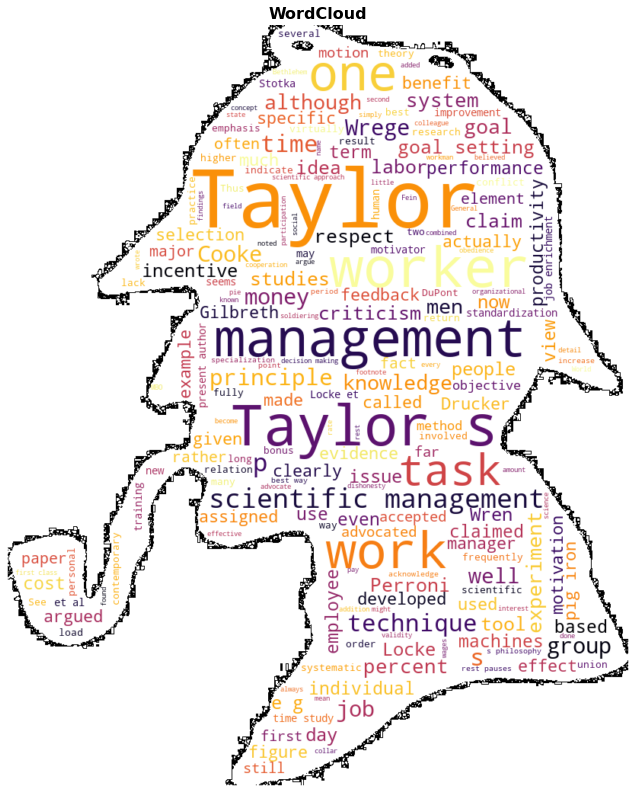

In [208]:
mask = np.array(Image.open("sherlock2.png"))

wordcloud=WordCloud(background_color='white',height=600,width=400,mask=mask,
                    contour_width=1,contour_color='black',colormap=plt.cm.inferno).generate(article)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud,interpolation="bilinear");
plt.axis('off');
plt.title('WordCloud',fontsize=16,fontweight='bold')
plt.show()

In [166]:
top_10_labels=df_word_freq.iloc[:,0]
top_10_labels=top_10_labels.values[:10].tolist()
top_10_labels

['Taylor',
 'management',
 'The',
 'work',
 'one',
 'scientific',
 'workers',
 'time',
 'worker',
 'p']

In [167]:
top_10_counts=df_word_freq.iloc[:,1]
top_10_counts=top_10_counts.values[:10].tolist()
top_10_counts

[145, 51, 32, 30, 27, 25, 21, 18, 17, 16]

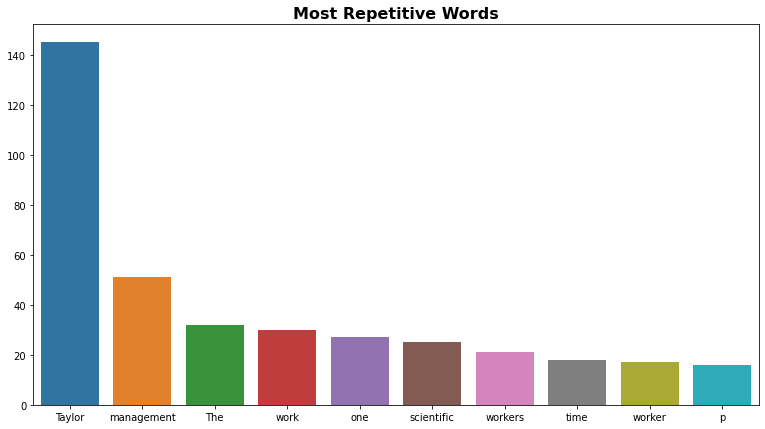

In [174]:
plt.figure(figsize=(13,7));
sns.barplot(top_10_labels,top_10_counts);
plt.title('Most Repetitive Words',fontsize=16,fontweight='bold');

In [9]:
for word in word_freq.keys():
    word_freq[word]=word_freq[word] / max_freq

In [10]:
word_freq

{'Few': 0.006896551724137931,
 'management': 0.35172413793103446,
 'theorists': 0.006896551724137931,
 'persistently': 0.006896551724137931,
 'criticized': 0.013793103448275862,
 'Frederick': 0.006896551724137931,
 'W': 0.006896551724137931,
 'Taylor': 1.0,
 'founder': 0.006896551724137931,
 'scientific': 0.1724137931034483,
 'despite': 0.013793103448275862,
 'widely': 0.013793103448275862,
 'recognized': 0.006896551724137931,
 'key': 0.020689655172413793,
 'figure': 0.04827586206896552,
 'history': 0.013793103448275862,
 'managment': 0.006896551724137931,
 'thought': 0.006896551724137931,
 'Wren': 0.06206896551724138,
 'frequently': 0.027586206896551724,
 'attacked': 0.013793103448275862,
 'lifetime': 0.013793103448275862,
 'prompting': 0.006896551724137931,
 'among': 0.006896551724137931,
 'responses': 0.006896551724137931,
 'Gilbreth': 0.041379310344827586,
 'Primer': 0.006896551724137931,
 'criticisms': 0.041379310344827586,
 'continued': 0.006896551724137931,
 'day': 0.06206896551

In [11]:
len(sentences)

261

# Calculate Each Sentence Score

In [12]:
sentence_scores={}

for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word_freq.keys():
            if len(sentence.split(" "))<30:
                if sentence not in sentence_scores.keys():
                    sentence_scores[sentence]=word_freq[word]
                else:
                    sentence_scores[sentence]+=word_freq[word]
                    
    

In [22]:
sentence_scores

{"Taylor and scientific management frequently were attacked in his own lifetime, prompting, among other responses, Gilbreth's Primer (Gilbreth, 1914/1973), and the criticisms have continued to this day.": 0.710344827586207,
 'The present author agrees with Drucker (1976), although not with all of his specific points, that Taylor has never been fully understood or appreciated by his critics.': 0.32413793103448274,
 'Many criticisms either have been invalid or have involved peripheral issues, and his major ideas and contributions often have gone unacknowledged.': 0.3310344827586207,
 "Wren (1979) did a superb job of showing how Taylor's major ideas permeated the field of management both in the United States and abroad.": 0.6137931034482759,
 "However, Wren was not concerned primarily with evaluating all of Taylor's techniques or the criticisms of his ideas.": 0.23448275862068962,
 'Boddewyn (1961), Drucker (1976), and Fry (1976) have made spirited defenses of Taylor, but more by way of b

In [23]:
#We take the first 40 sentences that have the maximum scores.
summary_sentences=heapq.nlargest(n=40,iterable=sentence_scores,key=sentence_scores.get)

In [24]:
summary_sentences

["It usually refers to scientific management's requirement of complete uniformity for a given job with respect to the tools and motions used by the workmen (the one best way).",
 'Taylor foresaw no need for unions once scientific management was properly established, especially because he saw the interests of management and labor as fundamentally the same (Copley, 1925/1976).',
 "A second element of Taylor's philosophy of management, and the other key aspect of the mental revolution that he advocated, concerned the relationship between management and labor.",
 'The Task Taylor advocated that each worker be assigned a specific amount of work, of a certain quality, each day based on the results of time study.',
 'However, socialist inefficiency, hostility to capitalist ideas, and resistance to change prevented the application of virtually all scientific management techniques in Russia except for the Gantt chart (Wren, 1980).',
 'Not only did Taylor recognize restriction of output, but one

In [25]:
# We stick all sentences in an article
final_summary=' '.join(summary_sentences)

In [17]:
final_summary

'It usually refers to scientific management\'s requirement of complete uniformity for a given job with respect to the tools and motions used by the workmen (the one best way). Taylor foresaw no need for unions once scientific management was properly established, especially because he saw the interests of management and labor as fundamentally the same (Copley, 1925/1976). A second element of Taylor\'s philosophy of management, and the other key aspect of the mental revolution that he advocated, concerned the relationship between management and labor. The Task Taylor advocated that each worker be assigned a specific amount of work, of a certain quality, each day based on the results of time study. However, socialist inefficiency, hostility to capitalist ideas, and resistance to change prevented the application of virtually all scientific management techniques in Russia except for the Gantt chart (Wren, 1980). Not only did Taylor recognize restriction of output, but one of the chief goals